# Support Vector Classifier

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Creating the synethetic data points

from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 2000, n_features = 2, n_classes=2, n_clusters_per_class=2,n_redundant = 0)
X

array([[-2.56616416, -2.12851238],
       [ 1.45037568,  0.20512243],
       [-0.40563162,  1.7183417 ],
       ...,
       [-1.40530548,  0.34104588],
       [ 0.05746944,  2.10541113],
       [-3.64047192, -2.11626955]])

In [4]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [5]:
pd.DataFrame(X)[0]

0      -2.566164
1       1.450376
2      -0.405632
3       0.413460
4      -2.301169
          ...   
1995   -1.699272
1996   -1.029582
1997   -1.405305
1998    0.057469
1999   -3.640472
Name: 0, Length: 2000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

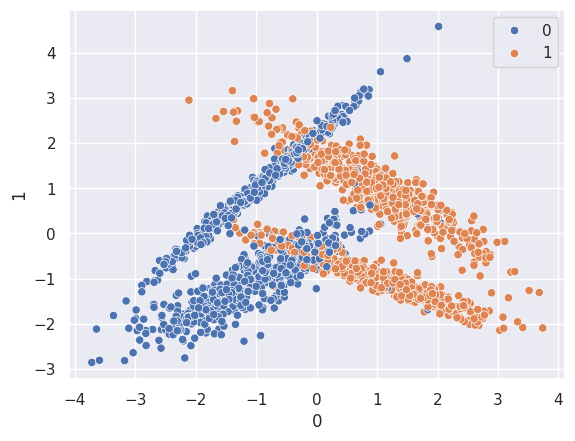

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
svc_x_train,svc_x_test,svc_y_train,svc_y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [8]:
print(svc_x_train.shape)
print(svc_y_train.shape)
print(svc_x_test.shape)
print(svc_y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [9]:
# Model Building

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc

SVC(kernel='linear')

In [10]:
# Fit the model

svc.fit(svc_x_train, svc_y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[ 1.59664684, -0.08348706]])

In [12]:
# Prediction

y_pred = svc.predict(svc_x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_pred,svc_y_test))
print(confusion_matrix(y_pred,svc_y_test))
print(accuracy_score(y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       195
           1       0.88      0.90      0.89       205

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[169  26]
 [ 21 184]]
0.8825


In [14]:
# Hyperparameter Tuning with Support Vector Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear']}

In [15]:
svc_grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv=5, verbose=3)
svc_grid.fit(svc_x_train,svc_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.856 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.856 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.856 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [16]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [17]:
#Prediction

svcgrid_y_pred = svc_grid.predict(svc_x_test)
print(classification_report(svcgrid_y_pred,svc_y_test))
print(confusion_matrix(svcgrid_y_pred,svc_y_test))
print(accuracy_score(svcgrid_y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       195
           1       0.87      0.89      0.88       205

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[168  27]
 [ 22 183]]
0.8775


# Support Vector Regressor

In [18]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)
X

array([[ 0.5765947 ,  1.29503551],
       [-0.06558517,  0.22366719],
       [-0.77084188, -0.16233499],
       ...,
       [-0.46519513, -0.18701283],
       [ 0.30850533, -0.39370463],
       [ 1.00577442,  1.28682136]])

In [19]:
y.shape

(1000,)

In [20]:
pd.DataFrame(X)[0]

0      0.576595
1     -0.065585
2     -0.770842
3     -0.507388
4      0.641329
         ...   
995    0.315087
996   -1.712679
997   -0.465195
998    0.308505
999    1.005774
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

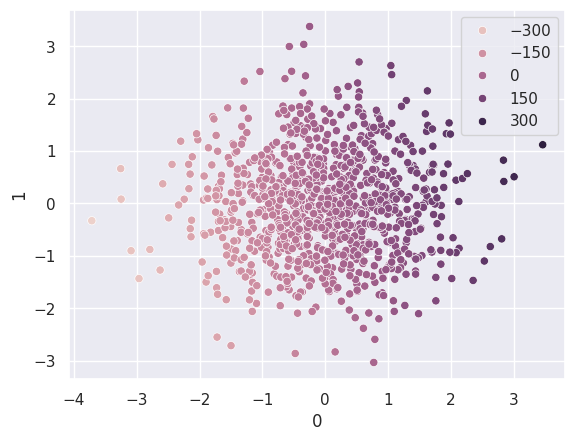

In [21]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

In [22]:
svr_x_train,svr_x_test,svr_y_train,svr_y_test = train_test_split(X,y,test_size = 0.25,random_state = 29)

In [23]:
print(svr_x_train.shape)
print(svr_x_test.shape)
print(svr_y_train.shape)
print(svr_y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [24]:
# Model Building

from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [25]:
svr.fit(svr_x_train,svr_y_train)

SVR(kernel='linear')

In [26]:
print(svr.coef_)

[[92.29861315 21.95969254]]


In [27]:
# Prediction

svr_y_pred = svc_grid.predict(svr_x_test)
svr_y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1])

In [28]:
from sklearn.metrics import r2_score

In [29]:
print(r2_score(svr_y_test,svr_y_pred))

0.008057095291921224


In [30]:
# Hyperparameter Tuning ith SVR

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]}

svr_grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [31]:
svr_grid.fit(svr_x_train,svr_y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.742 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.742 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.726 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
svr_grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [33]:
# Prediction

svr_y_predcv = svr_grid.predict(svr_x_test)
print(r2_score(svr_y_test,svr_y_predcv))

0.9989178318626283


# SVM Kernal Practical Implementation

In [34]:
# linespace create 100 number from range -5 to 5.

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([-y,y])
x = np.hstack([-x,x])

In [35]:
x1 = np.linspace(-5.0,5.0,100)
x1.shape

(100,)

In [36]:
# Creating y1 variable squaring the number and storing the dataset in y1

y1 = np.sqrt(5**2 - x1**2)
y1.shape

(100,)

In [37]:
# hstack - Stacking the data in horizontal order parameter

y1 = np.hstack([y1,-y1])
y1

array([ 0.        ,  0.99994898,  1.40690791,  1.71419826,  1.96904936,
        2.18984681,  2.38606299,  2.563349  ,  2.72540153,  2.87479787,
        3.01342099,  3.14269681,  3.26373625,  3.37742495,  3.48448249,
        3.5855029 ,  3.68098326,  3.77134438,  3.85694608,  3.93809873,
        4.0150721 ,  4.08810229,  4.1573971 ,  4.2231404 ,  4.28549564,
        4.34460872,  4.40061029,  4.45361771,  4.50373673,  4.55106276,
        4.59568209,  4.63767284,  4.67710582,  4.71404521,  4.7485492 ,
        4.78067053,  4.81045693,  4.83795152,  4.86319318,  4.88621682,
        4.90705366,  4.92573145,  4.94227468,  4.95670471,  4.96903995,
        4.97929598,  4.98748561,  4.99361903,  4.99770379,  4.99974492,
        4.99974492,  4.99770379,  4.99361903,  4.98748561,  4.97929598,
        4.96903995,  4.95670471,  4.94227468,  4.92573145,  4.90705366,
        4.88621682,  4.86319318,  4.83795152,  4.81045693,  4.78067053,
        4.7485492 ,  4.71404521,  4.67710582,  4.63767284,  4.59

In [38]:
x1 = np.hstack([x1, -x1])
x1

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

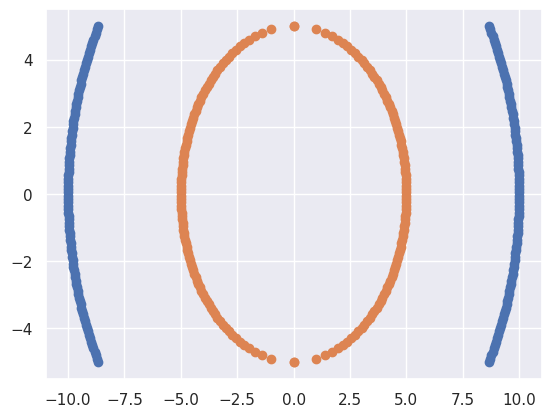

In [39]:
# Using the above x,y,x1,y1 dataset 2D Scatterplot

plt.scatter(y,x)
plt.scatter(y1,x1)

For outer line(blue color) are basically zero.

For inner line(orange color) are basically one.

In [40]:
#vstack = Stacking the data in vertically to create the datframe

x = np.hstack([x,np.zeros(y.shape[0] - x.shape[0])])
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1','X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)

df.sample(10)

,X1,X2,Y
110,9.169553,-3.989899,0
93,-8.982945,-4.393939,0
15,-9.373144,3.484848,0
101,8.717792,-4.898990,0
64,-9.892159,-1.464646,0
45,-9.989664,0.454545,0
371,-4.503737,-2.171717,1
127,9.738311,-2.272727,0
302,-1.406908,4.797980,1
90,-9.124936,-4.090909,0


In [41]:
# Independent features are stored in X and dependent features are stored in y

X = df.iloc[:,:-1]

In [42]:
y = df.Y
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [43]:
# Splitting the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [44]:
# Svm using the kernel = linear

cls = SVC(kernel = 'linear')
cls.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
cls_y_pred = cls.predict(X_test)
accuracy_score(y_test,cls_y_pred)

0.45

The accuracy is less than 50 not so good not linear separable

In [46]:
# Polynominal Kernal
#X1,X2,X1_Square,X2_Square,X1*X2

df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,-8.660254,5.00000,0,75.000000,25.000000,-43.301270
1,-8.717792,4.89899,0,75.999898,24.000102,-42.708375
2,-8.773790,4.79798,0,76.979390,23.020610,-42.096467
3,-8.828277,4.69697,0,77.938476,22.061524,-41.466150
4,-8.881281,4.59596,0,78.877155,21.122845,-40.818009


In [47]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [49]:
pol_X_train,pol_X_test,pol_y_train,pol_y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [50]:
pol_X_train.shape

(300, 5)

In [51]:
#3D Graph

import plotly.express as px
fig = px.scatter_3d(df, x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [52]:
#x1_square and x2_square

fig = px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()

In [54]:
# In the above diagram we can draw a hyperplane

lin_cls = SVC(kernel = 'linear')
lin_cls.fit(pol_X_train,pol_y_train)
pol_y_pred = lin_cls.predict(pol_X_test)
accuracy_score(pol_y_test,pol_y_pred)

1.0

# Support Vector Machine Completed